In [4]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\shiva\Downloads\movies.csv')

In [7]:
# Lets look at the data 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# Lets see if any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

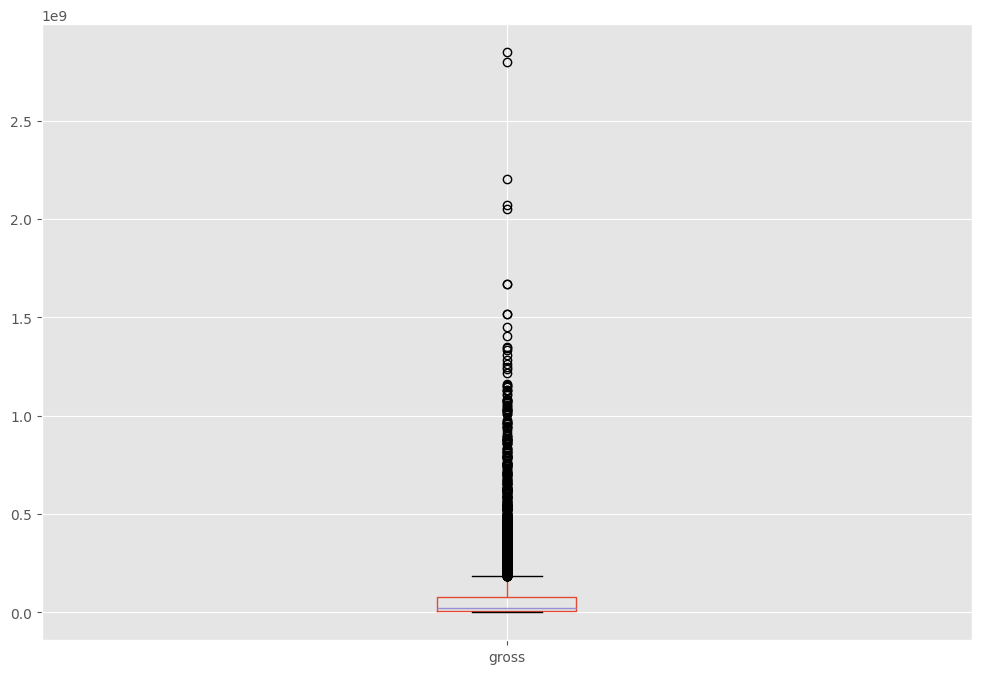

In [10]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [11]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [12]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<Axes: xlabel='gross', ylabel='budget'>

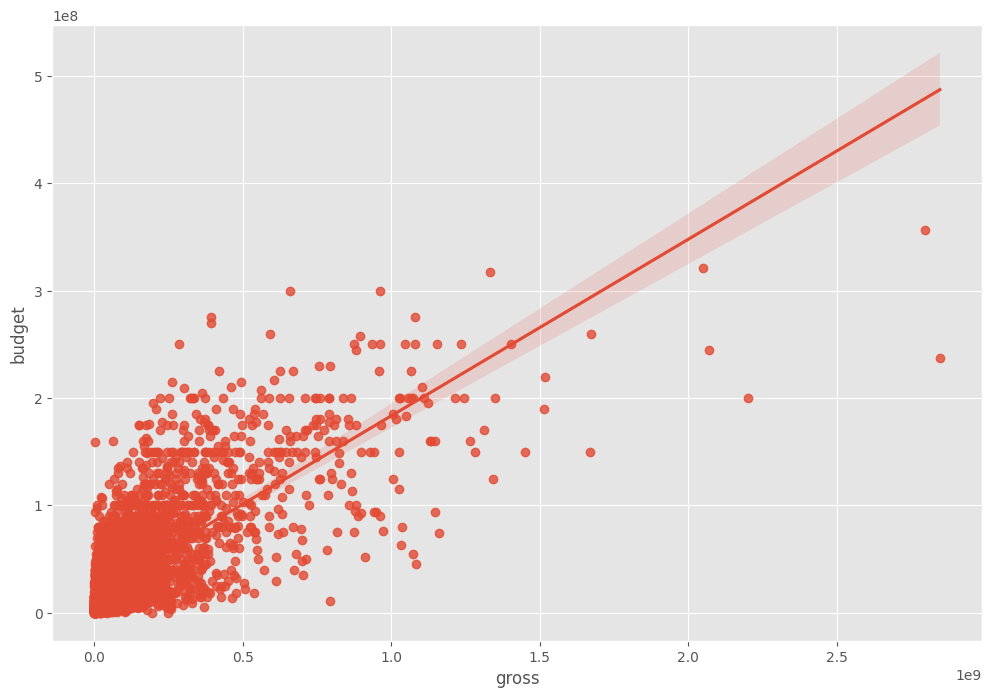

In [13]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

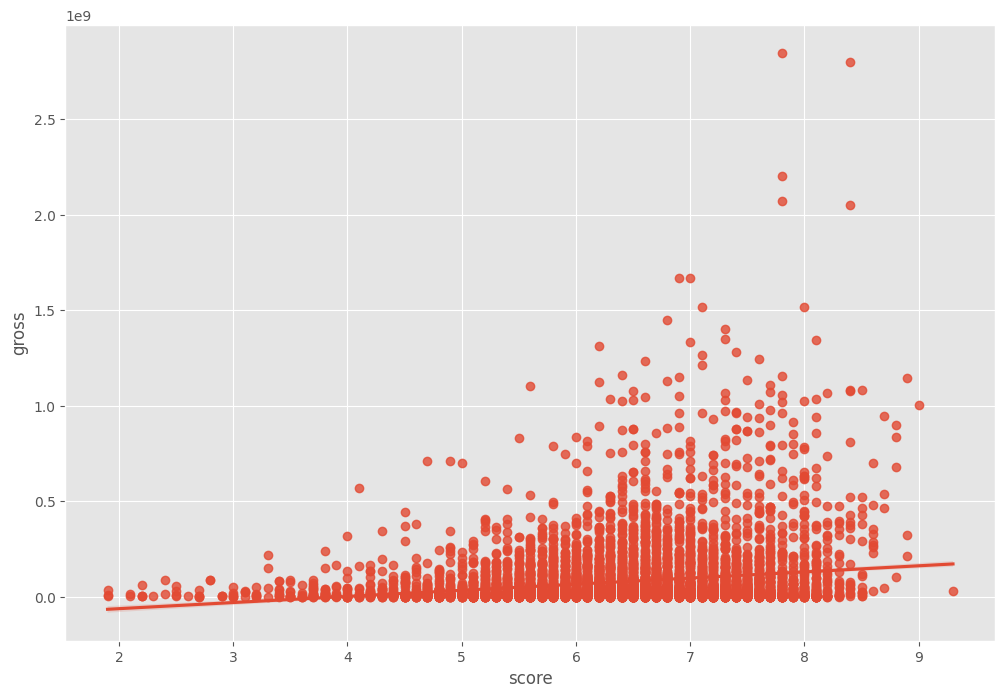

In [14]:
sns.regplot(x="score", y="gross", data=df)

In [18]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [26]:
df.corr(method ='kendall')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,NaN,NaN,-0.270973,NaN,0.066262,-0.025641,NaN,NaN,NaN,NaN,0.127273,0.102564,NaN,0.307692
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.270973,NaN,NaN,1.000000,NaN,0.067652,0.331465,NaN,NaN,NaN,NaN,0.224120,0.200618,NaN,0.097184
released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,0.066262,NaN,NaN,0.067652,NaN,1.000000,0.300115,NaN,NaN,NaN,NaN,-0.000566,0.086046,NaN,0.283611
votes,-0.025641,NaN,NaN,0.331465,NaN,0.300115,1.000000,NaN,NaN,NaN,NaN,0.353702,0.548899,NaN,0.198240
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.corr(method ='spearman')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,NaN,NaN,-0.382394,NaN,0.066484,-0.005495,NaN,NaN,NaN,NaN,0.081818,0.082418,NaN,0.439560
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.382394,NaN,NaN,1.000000,NaN,0.099045,0.469829,NaN,NaN,NaN,NaN,0.317336,0.293084,NaN,0.142977
released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,0.066484,NaN,NaN,0.099045,NaN,1.000000,0.428138,NaN,NaN,NaN,NaN,-0.001403,0.126116,NaN,0.399857
votes,-0.005495,NaN,NaN,0.469829,NaN,0.428138,1.000000,NaN,NaN,NaN,NaN,0.502466,0.742050,NaN,0.290159
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


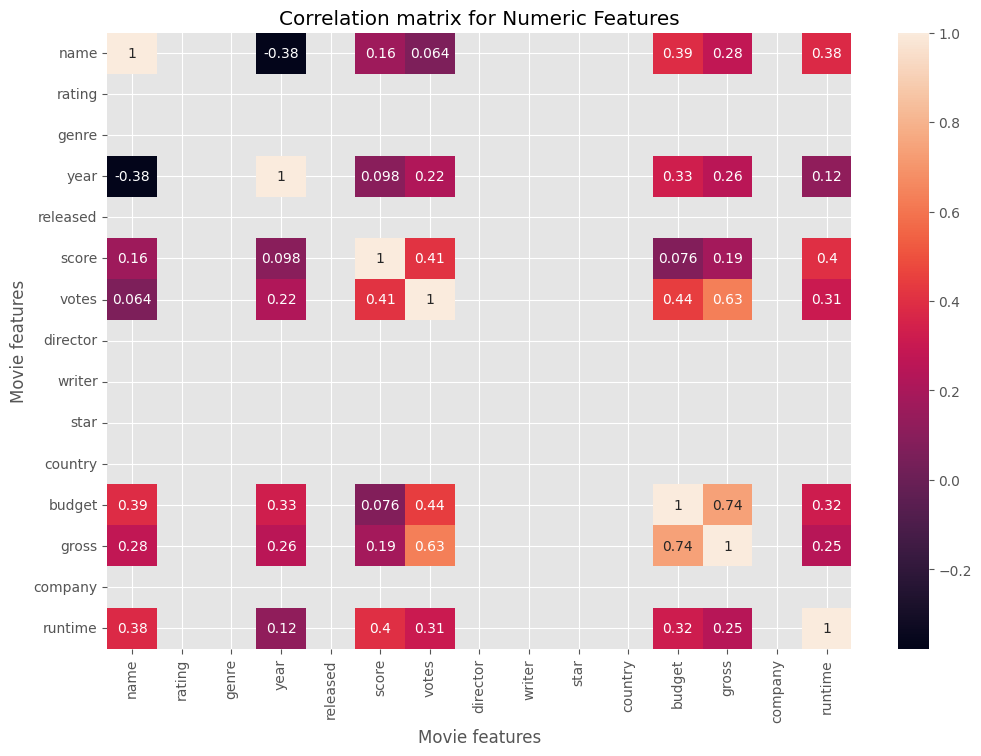

In [28]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [29]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,NaN,NaN,0.031790,NaN,-0.003768,0.031385,NaN,NaN,NaN,NaN,0.014120,0.031949,NaN,0.016283
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.031790,NaN,NaN,1.000000,NaN,-0.044981,0.312401,NaN,NaN,NaN,NaN,0.300621,0.980873,NaN,0.050647
released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,-0.003768,NaN,NaN,-0.044981,NaN,1.000000,-0.009749,NaN,NaN,NaN,NaN,-0.012642,-0.047041,NaN,0.026436
votes,0.031385,NaN,NaN,0.312401,NaN,-0.009749,1.000000,NaN,NaN,NaN,NaN,0.398519,0.286180,NaN,0.106024
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


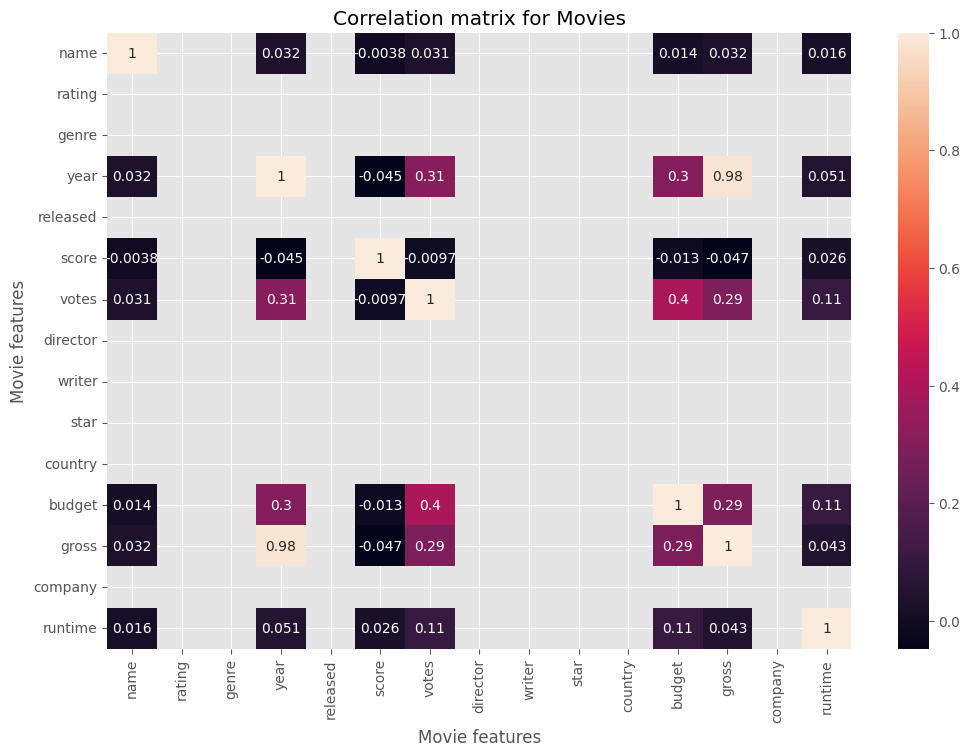

In [30]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [31]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating           NaN
         genre            NaN
         year        0.031790
         released         NaN
                       ...   
runtime  country          NaN
         budget      0.112097
         gross       0.042978
         company          NaN
         runtime     1.000000
Length: 225, dtype: float64


In [32]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

gross    score      -0.047041
score    gross      -0.047041
year     score      -0.044981
score    year       -0.044981
budget   score      -0.012642
                       ...   
runtime  director         NaN
         writer           NaN
         star             NaN
         country          NaN
         company          NaN
Length: 225, dtype: float64


In [33]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross    year       0.980873
year     gross      0.980873
name     name       1.000000
votes    votes      1.000000
budget   budget     1.000000
score    score      1.000000
year     year       1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64


In [35]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending=False).loc[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

Series([], Name: gross, dtype: int64)

In [36]:
df['Year'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,NaN,NaN,NaN,1980,NaN,8.4,927000.0,NaN,NaN,NaN,NaN,19000000.0,46998772.0,NaN,146.0,nan
1,NaN,NaN,NaN,1980,NaN,5.8,65000.0,NaN,NaN,NaN,NaN,4500000.0,58853106.0,NaN,104.0,nan
2,NaN,NaN,NaN,1980,NaN,8.7,1200000.0,NaN,NaN,NaN,NaN,18000000.0,538375067.0,NaN,124.0,nan
3,NaN,NaN,NaN,1980,NaN,7.7,221000.0,NaN,NaN,NaN,NaN,3500000.0,83453539.0,NaN,88.0,nan
4,NaN,NaN,NaN,1980,NaN,7.3,108000.0,NaN,NaN,NaN,NaN,6000000.0,39846344.0,NaN,98.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,NaN,NaN,NaN,2020,NaN,3.1,18.0,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,90.0,nan
7664,NaN,NaN,NaN,2020,NaN,4.7,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,nan
7665,NaN,NaN,NaN,2020,NaN,5.7,29.0,NaN,NaN,NaN,NaN,58750.0,NaN,NaN,NaN,nan
7666,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,120.0,nan


In [37]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,


In [38]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

Series([], Name: gross, dtype: int64)

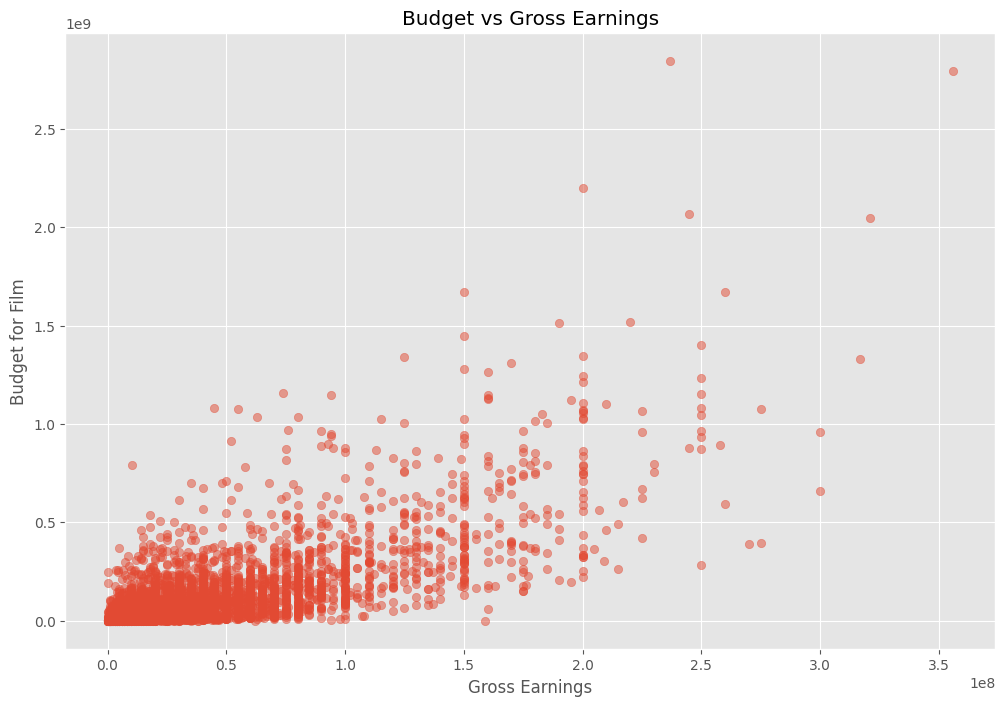

In [39]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [40]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,NaN,NaN,NaN,1980,NaN,8.4,927000.0,NaN,NaN,NaN,NaN,19000000.0,46998772.0,NaN,146.0,nan
1,NaN,NaN,NaN,1980,NaN,5.8,65000.0,NaN,NaN,NaN,NaN,4500000.0,58853106.0,NaN,104.0,nan
2,NaN,NaN,NaN,1980,NaN,8.7,1200000.0,NaN,NaN,NaN,NaN,18000000.0,538375067.0,NaN,124.0,nan
3,NaN,NaN,NaN,1980,NaN,7.7,221000.0,NaN,NaN,NaN,NaN,3500000.0,83453539.0,NaN,88.0,nan
4,NaN,NaN,NaN,1980,NaN,7.3,108000.0,NaN,NaN,NaN,NaN,6000000.0,39846344.0,NaN,98.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,NaN,NaN,NaN,2020,NaN,3.1,18.0,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,90.0,nan
7664,NaN,NaN,NaN,2020,NaN,4.7,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,nan
7665,NaN,NaN,NaN,2020,NaN,5.7,29.0,NaN,NaN,NaN,NaN,58750.0,NaN,NaN,NaN,nan
7666,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,120.0,nan


In [41]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,NaN,NaN,NaN,1980,NaN,8.4,927000.0,NaN,NaN,NaN,NaN,19000000.0,46998772.0,NaN,146.0,0
1,NaN,NaN,NaN,1980,NaN,5.8,65000.0,NaN,NaN,NaN,NaN,4500000.0,58853106.0,NaN,104.0,0
2,NaN,NaN,NaN,1980,NaN,8.7,1200000.0,NaN,NaN,NaN,NaN,18000000.0,538375067.0,NaN,124.0,0
3,NaN,NaN,NaN,1980,NaN,7.7,221000.0,NaN,NaN,NaN,NaN,3500000.0,83453539.0,NaN,88.0,0
4,NaN,NaN,NaN,1980,NaN,7.3,108000.0,NaN,NaN,NaN,NaN,6000000.0,39846344.0,NaN,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,NaN,NaN,NaN,2020,NaN,3.1,18.0,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,90.0,0
7664,NaN,NaN,NaN,2020,NaN,4.7,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0
7665,NaN,NaN,NaN,2020,NaN,5.7,29.0,NaN,NaN,NaN,NaN,58750.0,NaN,NaN,NaN,0
7666,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,120.0,0


In [42]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,NaN,NaN,-0.377181,NaN,0.164244,0.063537,NaN,NaN,NaN,NaN,0.390134,0.275889,NaN,0.379230,NaN
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.377181,NaN,NaN,1.000000,NaN,0.097995,0.222945,NaN,NaN,NaN,NaN,0.329321,0.257486,NaN,0.120811,NaN
released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,0.164244,NaN,NaN,0.097995,NaN,1.000000,0.409182,NaN,NaN,NaN,NaN,0.076254,0.186258,NaN,0.399451,NaN
votes,0.063537,NaN,NaN,0.222945,NaN,0.409182,1.000000,NaN,NaN,NaN,NaN,0.442429,0.630757,NaN,0.309212,NaN
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


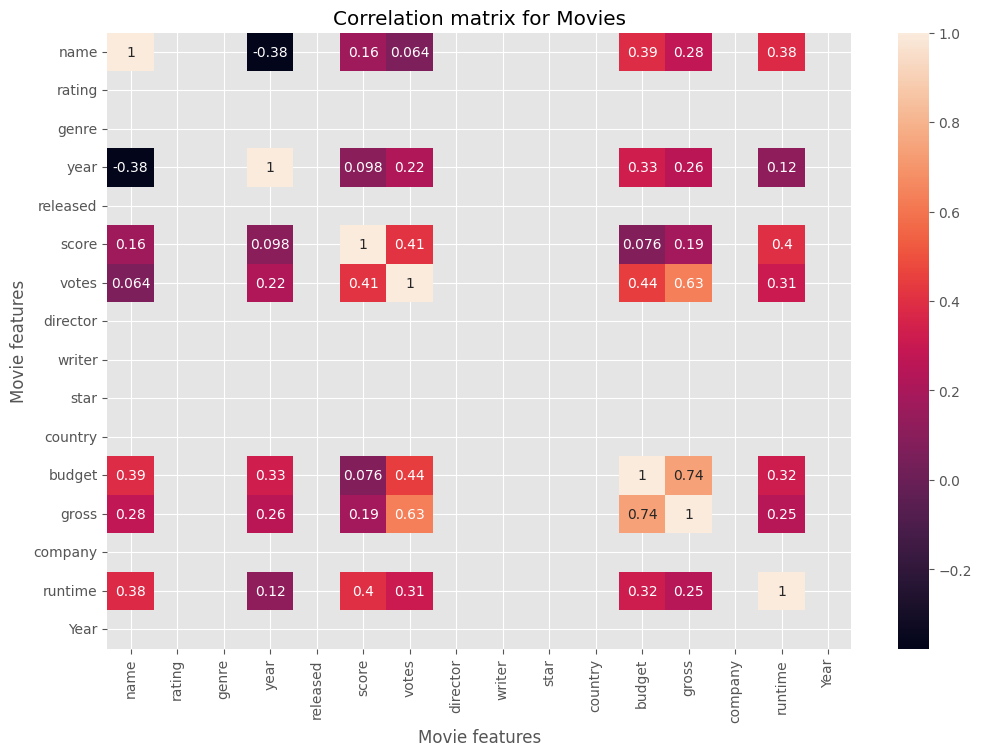

In [43]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [45]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes